In [2]:
# Segment Three Machine Learning Model
# Initial version by Josh Stowe, Team Hansen Brothers, Final Capstone Project 202211/10

In [3]:
# mlenv (Python 3.7.13)
# Import dependencies
import numpy as np
import pandas as pd
from pandas import DataFrame
from pathlib import Path
from collections import Counter
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
# from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import requests


In [6]:
# # Load the game stats database for split, train, test
# file_path = Path('Resources/game_teams_stats.csv')
# df = pd.read_csv(file_path)
# df.head()
file_path = Path('Resources/ml_table_copy.csv')
adv_df_og = pd.read_csv(file_path)
adv_df = adv_df_og
adv_df_og.head()



,game_id,team_id_home,abbreviation_home,won_home,goals_home,powerPlayPrct_home,penaltyKillPrct_home,shots_home,shotsallowed_home,winoutshootopp_home,...,goals_away,powerPlayPrct_away,penaltyKillPrct_away,shots_away,shotsallowed_away,winoutshootopp_away,winoutshotbyopp_away,faceOffWinPercentage_away,shootingPrct_away,savePrct_away
0,2000020003,7,BUF,t,4,0.000000,0.857143,30,21,True,...,2,0.142857,1.000000,21,30,False,False,50.000007,0.095238,0.866667
1,2000020004,4,PHI,t,6,0.428571,1.000000,33,29,True,...,3,0.000000,0.571429,29,33,False,False,50.000007,0.103448,0.818182
2,2000020005,20,CGY,f,3,0.000000,0.750000,21,28,False,...,4,0.250000,1.000000,28,21,True,False,50.000007,0.142857,0.857143
3,2000020006,27,PHX,t,4,0.333333,0.750000,20,33,False,...,1,0.250000,0.666667,33,20,False,False,50.000007,0.030303,0.800000
4,2000020007,1,NJD,t,8,0.250000,0.571429,34,30,True,...,4,0.428571,0.750000,30,34,False,False,50.000007,0.133333,0.764706


# Placeholder for preprocessing

In [7]:
adv_df.isna().sum()

game_id                      0
team_id_home                 0
abbreviation_home            0
won_home                     0
goals_home                   0
powerPlayPrct_home           0
penaltyKillPrct_home         0
shots_home                   0
shotsallowed_home            0
winoutshootopp_home          0
winoutshotbyopp_home         0
faceOffWinPercentage_home    0
shootingPrct_home            0
savePrct_home                0
team_id_away                 0
abbreviation_away            0
won_away                     0
goals_away                   0
powerPlayPrct_away           0
penaltyKillPrct_away         0
shots_away                   0
shotsallowed_away            0
winoutshootopp_away          0
winoutshotbyopp_away         0
faceOffWinPercentage_away    0
shootingPrct_away            0
savePrct_away                0
dtype: int64

In [8]:
# preprocessing, TBC after db cleaning complete
# merge dfs
# adv_df = advanced_home_df.reset_index().join(advanced_away_df, on='game_id', lsuffix='home_', rsuffix='away_')

# encode home_win true to 1, false to 0
# Use LabelEncoder to convert 'M/F' into integer labels
adv_df = adv_df_og
adv_df['won_home'] = LabelEncoder().fit_transform(adv_df['won_home'])

# drop columns not relevant
adv_df = adv_df.drop(columns="won_away")
adv_df = adv_df.drop(columns="abbreviation_home")
adv_df = adv_df.drop(columns="abbreviation_away")
adv_df = adv_df.drop(columns="team_id_home")
adv_df = adv_df.drop(columns="team_id_away")
adv_df = adv_df.drop(columns="game_id")
adv_df = adv_df.drop(columns="goals_home")
adv_df = adv_df.drop(columns="goals_away")


# encode winoutshootopp_home, winoutshotopp_home, winoutshotbyopp_away, winoutshootbyopp_away true to 1, false to 0
adv_df['winoutshootopp_home'] = LabelEncoder().fit_transform(adv_df['winoutshootopp_home'])
adv_df['winoutshotbyopp_home'] = LabelEncoder().fit_transform(adv_df['winoutshotbyopp_home'])
adv_df['winoutshootopp_away'] = LabelEncoder().fit_transform(adv_df['winoutshootopp_away'])
adv_df['winoutshotbyopp_away'] = LabelEncoder().fit_transform(adv_df['winoutshotbyopp_away'])

adv_df = adv_df.drop(columns="winoutshootopp_home")
adv_df = adv_df.drop(columns="winoutshotbyopp_home")
adv_df = adv_df.drop(columns="winoutshootopp_away")
adv_df = adv_df.drop(columns="winoutshotbyopp_away")


# Split the Data into Training and Testing

In [9]:
# Create the features
# adjust X df with the target features
X = adv_df.drop(columns="won_home")
X.head()

,powerPlayPrct_home,penaltyKillPrct_home,shots_home,shotsallowed_home,faceOffWinPercentage_home,shootingPrct_home,savePrct_home,powerPlayPrct_away,penaltyKillPrct_away,shots_away,shotsallowed_away,faceOffWinPercentage_away,shootingPrct_away,savePrct_away
0,0.000000,0.857143,30,21,50.000007,0.133333,0.904762,0.142857,1.000000,21,30,50.000007,0.095238,0.866667
1,0.428571,1.000000,33,29,50.000007,0.181818,0.896552,0.000000,0.571429,29,33,50.000007,0.103448,0.818182
2,0.000000,0.750000,21,28,50.000007,0.142857,0.857143,0.250000,1.000000,28,21,50.000007,0.142857,0.857143
3,0.333333,0.750000,20,33,50.000007,0.200000,0.969697,0.250000,0.666667,33,20,50.000007,0.030303,0.800000
4,0.250000,0.571429,34,30,50.000007,0.235294,0.866667,0.428571,0.750000,30,34,50.000007,0.133333,0.764706


In [10]:
# create the target
y = adv_df["won_home"]
y.head()

0    1
1    1
2    0
3    1
4    1
Name: won_home, dtype: int32

In [11]:
X.describe()

,powerPlayPrct_home,penaltyKillPrct_home,shots_home,shotsallowed_home,faceOffWinPercentage_home,shootingPrct_home,savePrct_home,powerPlayPrct_away,penaltyKillPrct_away,shots_away,shotsallowed_away,faceOffWinPercentage_away,shootingPrct_away,savePrct_away
count,22514.000000,22514.000000,22514.000000,22514.000000,22514.000000,22514.000000,22514.000000,22514.000000,22514.000000,22514.000000,22514.000000,22514.000000,22514.000000,22514.000000
mean,0.186865,0.824865,30.674336,28.893799,50.868791,0.098514,0.905601,0.175135,0.813135,28.893799,30.674336,49.131219,0.094399,0.901486
std,0.224687,0.231138,6.882294,6.707059,5.211762,0.059788,0.060479,0.231138,0.224687,6.707059,6.882294,5.211773,0.060479,0.059788
min,0.000000,0.000000,6.000000,4.000000,24.100000,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,20.800000,0.000000,0.000000
25%,0.000000,0.666667,26.000000,24.000000,50.000007,0.055556,0.869565,0.000000,0.666667,24.000000,26.000000,47.700000,0.050000,0.864865
50%,0.142857,1.000000,30.000000,29.000000,50.000007,0.090909,0.913043,0.000000,0.857143,29.000000,30.000000,50.000007,0.086957,0.909091
75%,0.333333,1.000000,35.000000,33.000000,52.300000,0.135135,0.950000,0.333333,1.000000,33.000000,35.000000,50.000007,0.130435,0.944444
max,1.000000,1.000000,88.000000,63.000000,79.200000,1.000000,1.000000,1.000000,1.000000,63.000000,88.000000,75.900000,1.000000,1.000000


In [12]:
X.dtypes

powerPlayPrct_home           float64
penaltyKillPrct_home         float64
shots_home                     int64
shotsallowed_home              int64
faceOffWinPercentage_home    float64
shootingPrct_home            float64
savePrct_home                float64
powerPlayPrct_away           float64
penaltyKillPrct_away         float64
shots_away                     int64
shotsallowed_away              int64
faceOffWinPercentage_away    float64
shootingPrct_away            float64
savePrct_away                float64
dtype: object

In [13]:
# Placeholder for column data type conversion

In [14]:
# Create train, test datasets
# Intention is to test sensitivity of test accuracy with the train/test size and select the split ratio that gives the 
# best accuracy prior to another sampling adjustments.
X_train, X_test, y_train, y_test = train_test_split(X, y)
# X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=None, test_size=0.15)



In [15]:
X_train

,powerPlayPrct_home,penaltyKillPrct_home,shots_home,shotsallowed_home,faceOffWinPercentage_home,shootingPrct_home,savePrct_home,powerPlayPrct_away,penaltyKillPrct_away,shots_away,shotsallowed_away,faceOffWinPercentage_away,shootingPrct_away,savePrct_away
11428,0.0,1.000000,26,23,53.300000,0.000000,0.956522,0.000000,1.0,23,26,46.700000,0.043478,1.000000
5105,0.0,0.875000,33,20,50.000007,0.090909,0.850000,0.125000,1.0,20,33,50.000007,0.150000,0.909091
5049,0.4,0.666667,27,32,50.000007,0.222222,0.875000,0.333333,0.6,32,27,50.000007,0.125000,0.777778
1483,0.0,1.000000,37,20,50.000007,0.027027,0.850000,0.000000,1.0,20,37,50.000007,0.150000,0.972973
14273,0.0,0.750000,41,33,55.400000,0.073171,0.878788,0.250000,1.0,33,41,44.600000,0.121212,0.926829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2596,0.0,0.800000,35,23,50.000007,0.057143,0.826087,0.200000,1.0,23,35,50.000007,0.173913,0.942857
7482,0.0,1.000000,37,37,50.000007,0.081081,0.945946,0.000000,1.0,37,37,50.000007,0.054054,0.918919
19006,0.2,0.666667,31,29,55.900000,0.193548,0.896552,0.333333,0.8,29,31,44.100000,0.103448,0.806452
16840,0.0,1.000000,34,31,49.200000,0.029412,0.870968,0.000000,1.0,31,34,50.800000,0.129032,0.970588


In [16]:
X_test

,powerPlayPrct_home,penaltyKillPrct_home,shots_home,shotsallowed_home,faceOffWinPercentage_home,shootingPrct_home,savePrct_home,powerPlayPrct_away,penaltyKillPrct_away,shots_away,shotsallowed_away,faceOffWinPercentage_away,shootingPrct_away,savePrct_away
1907,0.000000,0.666667,24,21,50.000007,0.166667,0.857143,0.333333,1.000000,21,24,50.000007,0.142857,0.833333
7024,0.333333,1.000000,43,25,50.000007,0.069767,0.840000,0.000000,0.666667,25,43,50.000007,0.160000,0.930233
7611,0.285714,0.750000,51,30,50.000007,0.039216,0.933333,0.250000,0.714286,30,51,50.000007,0.066667,0.960784
21362,0.333333,0.500000,32,30,45.700000,0.156250,0.900000,0.500000,0.666667,30,32,54.300000,0.100000,0.843750
11299,0.000000,0.666667,36,26,51.600000,0.111111,0.846154,0.333333,1.000000,26,36,48.400000,0.153846,0.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6212,1.000000,1.000000,32,32,50.000007,0.125000,0.937500,0.000000,0.000000,32,32,50.000007,0.062500,0.875000
20959,0.000000,1.000000,28,26,51.100000,0.071429,0.961538,0.000000,1.000000,26,28,48.900000,0.038462,0.928571
11454,0.000000,1.000000,32,33,52.400000,0.000000,0.939394,0.000000,1.000000,33,32,47.600000,0.060606,1.000000
18062,0.000000,1.000000,30,20,47.400000,0.000000,0.950000,0.000000,1.000000,20,30,52.600000,0.050000,1.000000


In [17]:
y_train

11428    0
5105     1
5049     1
1483     0
14273    0
        ..
2596     0
7482     1
19006    1
16840    0
22242    1
Name: won_home, Length: 16885, dtype: int32

In [18]:
y_test

1907     1
7024     0
7611     0
21362    1
11299    1
        ..
6212     1
20959    1
11454    0
18062    0
1386     0
Name: won_home, Length: 5629, dtype: int32

# Scaler Implementation

In [19]:
# Placeholder for any scaler implementation
# Scale the dataset using MinMaxScaler()
# X_scaled = MinMaxScaler().fit_transform(X)

# Scale the dataset using StandardScaler()
# X_scaled = StandardScaler().fit_transform(X)

# X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y,stratify=None, test_size=0.15)
# X_scaled

# ML model

In [20]:
# LogisticRegression model, predicting a 1 or 0 outcome
classifier = LogisticRegression()
classifier

classifier.fit(X_train, y_train)
# classifier.fit(X_train_scaled, y_train)

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

# print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
# print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

# Tesing the non-negative least squares if db allows
# model = LinearRegression(positive=True)

# # Fit the model to the training data, and calculate the scores for the training and testing data.
# model.fit(X_train, y_train)
# y_pred = model.fit(X_train,y_train).predict(X_test)
# y_pred = model.predict(X_test)

# training_score = model.score(X_train, y_train)
# testing_score = model.score(X_test, y_test)
# r2_score_model = r2_score(y_test,y_pred)

# print(f"Training Score: {training_score}")
# print(f"Testing Score: {testing_score}")
# print(f"R2 score", r2_score_model)

Training Data Score: 0.9479419603198105
Testing Data Score: 0.9422632794457275


,Prediction,Actual
1907,1,1
7024,0,0
7611,1,0
21362,1,1
11299,0,1
...,...,...
6212,1,1
20959,1,1
11454,0,0
18062,0,0


# Confusion Matrix

In [21]:
# Setup confusion matrix to show test outcomes vs predicted
y_true = y_test
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_true, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,2361,181
Actual 1,144,2943


In [23]:
# Calculate ML model accuracy
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9422632794457275


In [24]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 0.999822327509624
Testing Score: 0.9531000177651447


[0.01535965 0.01438418 0.03192808 0.03260197 0.01321653 0.20303508
 0.19388193 0.01407215 0.01572632 0.0324776  0.03254732 0.01325657
 0.19080233 0.19671029]


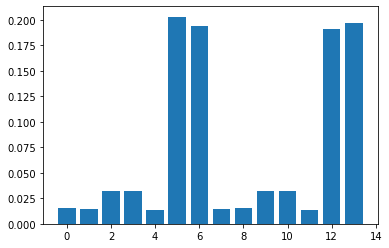

In [25]:
from matplotlib import pyplot as plt
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [26]:
# calculate precision
precision = tp / (tp + fp)
precision

0.9420614596670934

In [27]:
# Calculate the sensitivity of the model based on the confusion matrix
sensitivity = tp / (tp + fn)
sensitivity

0.9533527696793003

In [29]:
# calculate F1 score
f1 = 2*precision*sensitivity / (precision + sensitivity)
f1

0.9476734825309935

In [30]:
# summarize in classification report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2542
           1       0.94      0.95      0.95      3087

    accuracy                           0.94      5629
   macro avg       0.94      0.94      0.94      5629
weighted avg       0.94      0.94      0.94      5629



In [ ]:
# export model to h5


# Predictions

In [59]:
# Model prediction with API
away_id = 30
home_id = 55

# team API
url = "https://statsapi.web.nhl.com/api/v1/teams/"+str(away_id)+"/?expand=team.stats"
away = requests.get(url).json()

# home team API
url = "https://statsapi.web.nhl.com/api/v1/teams/"+str(home_id)+"/?expand=team.stats"
home = requests.get(url).json()

# compile data from jsons
gamedata = []
id = home['teams'][0]['teamStats'][0]['splits'][0]['team']['id']
home_name = home['teams'][0]['teamStats'][0]['splits'][0]['team']['name']
gpg = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['goalsPerGame']
gapg = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['goalsAgainstPerGame']
pppctg = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['powerPlayPercentage']
pkpctg = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['penaltyKillPercentage']
shots = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['shotsPerGame']
shotsallowed = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['shotsAllowed']
winoutshootopp = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['winOutshootOpp']
winoutshotbyopp = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['winOutshotByOpp']
faceoffpctg = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['faceOffWinPercentage']
shootingpctg = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['shootingPctg']
savepctg = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['savePctg']
gamedata.append({
    # "id" : id,
                  # "name" : name,
                #  "gpg" : gpg,
                #  "gapg" : gapg,
                 "powerPlayPrct_home" : float(pppctg)/100,
                 "penaltyKillPrct_home" : float(pkpctg)/100,
                 "shots_home" : shots,
                 "shotsallowed_home" : shotsallowed,
                #  "winoutshootopp" : winoutshootopp,
                #  "winoutshotbyopp" : winoutshotbyopp,
                 "faceOffWinPercentage_home" : faceoffpctg,
                 "shootingPrct_home" : float(shootingpctg)/100,
                 "savePrct_home" : savepctg})
home_df = pd.DataFrame(gamedata)
# away data
gamedata = []
id = away['teams'][0]['teamStats'][0]['splits'][0]['team']['id']
away_name = away['teams'][0]['teamStats'][0]['splits'][0]['team']['name']
gpg = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['goalsPerGame']
gapg = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['goalsAgainstPerGame']
pppctg = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['powerPlayPercentage']
pkpctg = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['penaltyKillPercentage']
shots = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['shotsPerGame']
shotsallowed = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['shotsAllowed']
winoutshootopp = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['winOutshootOpp']
winoutshotbyopp = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['winOutshotByOpp']
faceoffpctg = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['faceOffWinPercentage']
shootingpctg = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['shootingPctg']
savepctg = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['savePctg']
gamedata.append({
    # "awayid" : id,
                #  "awayname" : name,
                #  "gpg" : gpg,
                #  "gapg" : gapg,
                 "powerPlayPrct_away" : float(pppctg)/100,
                 "penaltyKillPrct_away" : float(pkpctg)/100,
                 "shots_away" : shots,
                 "shotsallowed_away" : shotsallowed,
                #  "winoutshootopp" : winoutshootopp,
                #  "winoutshotbyopp" : winoutshotbyopp,
                 "faceOffWinPercentage_away" : faceoffpctg,
                 "shootingPrct_away" : float(shootingpctg)/100,
                 "savePrct_away" : savepctg})
away_df = pd.DataFrame(gamedata)
# combine home and away current stats dataframes
compiled_stats_df = pd.concat([home_df,away_df],axis=1)
# test_df = test_df.drop(columns="name")
# test_df = test_df.drop(columns="awayname")
prediction = classifier.predict(compiled_stats_df)
predicted_winner = home_name
if int(prediction[0]) == 0:
    predicted_winner = away_name
  
# pd.DataFrame({"Prediction": predicted_winner})
predicted_winner

'Seattle Kraken'